## Importing packages

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Reading and displaying an image

In [2]:
image = cv2.imread('images/car1.jpeg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

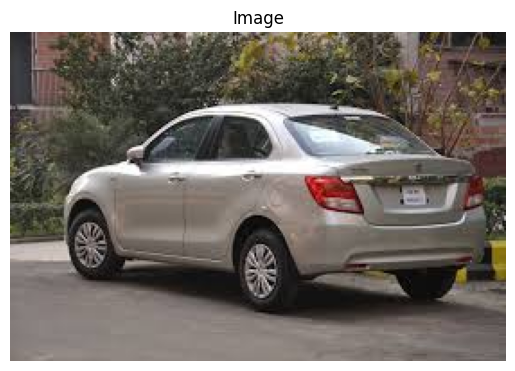

In [3]:
plt.axis('off')
plt.title("Image")
plt.imshow(img)

## Image Conversion to Different Types

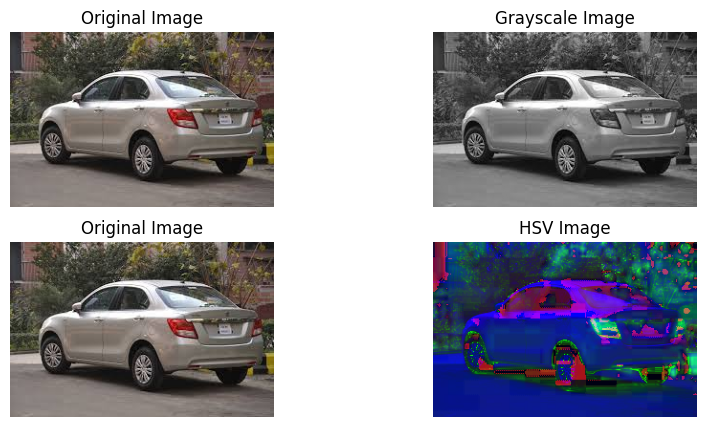

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# cv2.imshow("Grayscale Image", gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(10, 5))
plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(2,2,2)
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("HSV Image")
plt.axis('off')
plt.imshow(hsv)

## Resize an Image

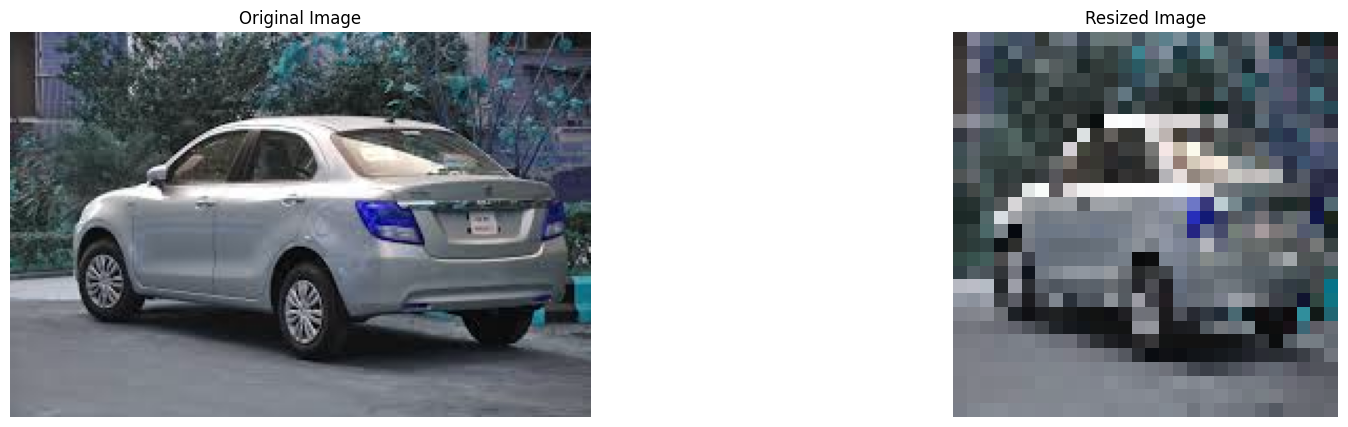

In [5]:
ri = cv2.resize(image, (28, 28))

plt.figure(figsize=(20, 5))

plt.subplot(1, 2,1)
plt.axis("off")
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1,2,2)
plt.axis('off')
plt.title("Resized Image")
plt.imshow(ri)

## Normalized Image

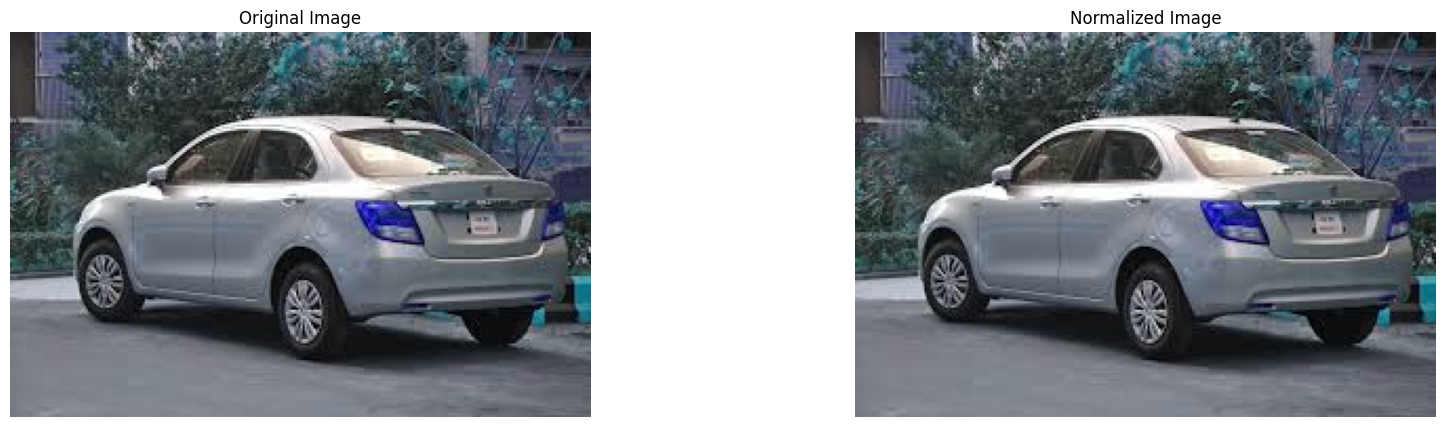

In [6]:
ni = image.astype("float32")/255.0

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("Normalized Image")
plt.imshow(ni)

## Log Transformation

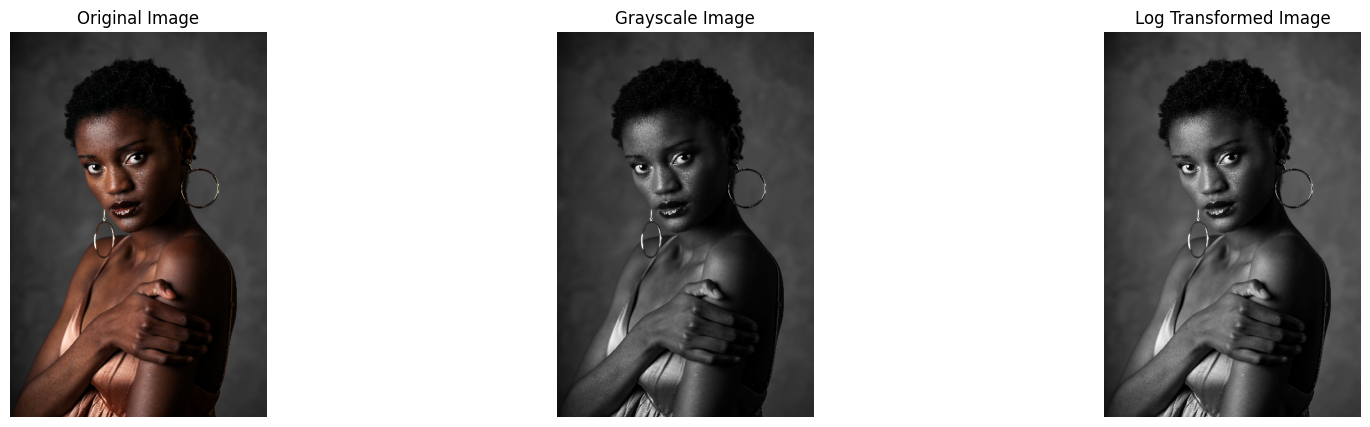

In [13]:
image = cv2.imread("images/model2.jpg")
image = cv2.resize(image,(400, 600))
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


gray_log = gray.astype("float32")/255.0
logImg = np.log1p(gray_log)
logImg = cv2.normalize(logImg, None, 0, 255, cv2.NORM_MINMAX)
logImg=logImg.astype('uint8')

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Original Image")
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.title("Log Transformed Image")
plt.imshow(logImg, cmap='gray')


cv2.imshow("Log Transform", logImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Gamma Correction

(3992, 5981, 3)


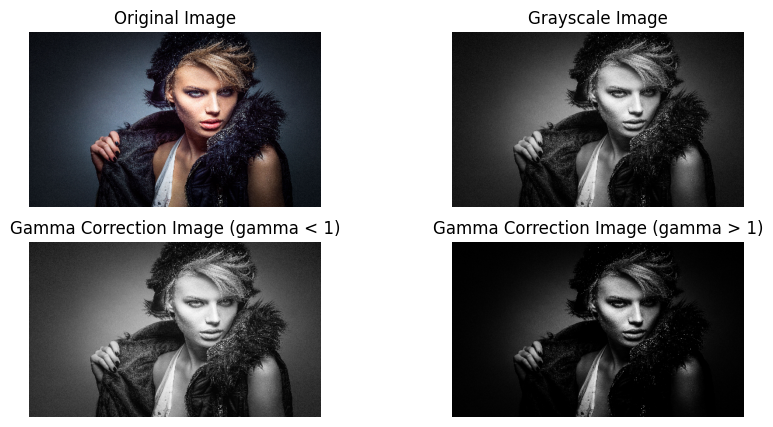

In [15]:
image = cv2.imread('images/model3.jpg')
print(image.shape) # shape of the image (height, width, channel)
image = cv2.resize(image, (500, 300))
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ni = gray.astype("float32")/255.0 # normalize the image

g1 = 0.7 # brightes darker regions
gamma_correction = np.power(ni, g1)*255

gamma_correction = gamma_correction.astype('uint8')


g2 = 1.9  # darkens brighter regions
gamma_correction2 = (ni ** g2)*255
gamma_correction2 = gamma_correction2.astype('uint8')

# cv2.imshow("gamma c.", gamma_correction2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.axis("off")
plt.title("Original Image")
plt.imshow(img)

plt.subplot(2, 2, 2)
plt.axis("off")
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')

plt.subplot(2, 2, 3)
plt.axis("off")
plt.title("Gamma Correction Image (gamma < 1)")
plt.imshow(gamma_correction, cmap='gray')

plt.subplot(2, 2, 4)
plt.axis("off")
plt.title("Gamma Correction Image (gamma > 1)")
plt.imshow(gamma_correction2, cmap='gray')

## Blurring and Smoothing (Noise Removal)

(2432, 1767, 3)


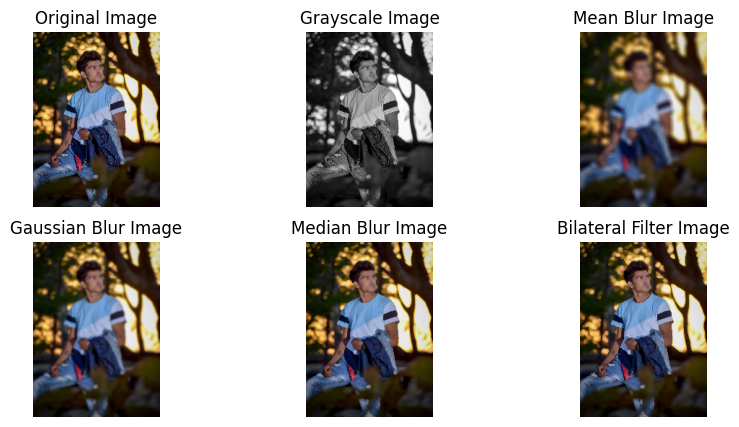

In [9]:
image = cv2.imread('images/model7.jpg')
print(image.shape)
image = cv2.resize(image, (176, 243))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

avgBlur = cv2.blur(img, (7,7))
gaussianBlur = cv2.GaussianBlur(img, (5,5), 0)

medianBlur = cv2.medianBlur(img, 3)

bilateral_filter = cv2.bilateralFilter(img, 5, sigmaColor=75, sigmaSpace=75)

# cv2.imshow("Mean Blur", avgBlur)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.axis("off")
plt.title("Original Image")
plt.imshow(img)

plt.subplot(2, 3, 2)
plt.axis("off")
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')

plt.subplot(2, 3, 3)
plt.axis("off")
plt.title("Mean Blur Image")
plt.imshow(avgBlur, cmap='gray')

plt.subplot(2, 3, 4)
plt.axis("off")
plt.title("Gaussian Blur Image")
plt.imshow(gaussianBlur, cmap='gray')

plt.subplot(2, 3, 5)
plt.axis("off")
plt.title("Median Blur Image")
plt.imshow(medianBlur, cmap='gray')

plt.subplot(2, 3, 6)
plt.axis("off")
plt.title("Bilateral Filter Image")
plt.imshow(bilateral_filter, cmap='gray')

## Edge Detection (Sobel and Canny)

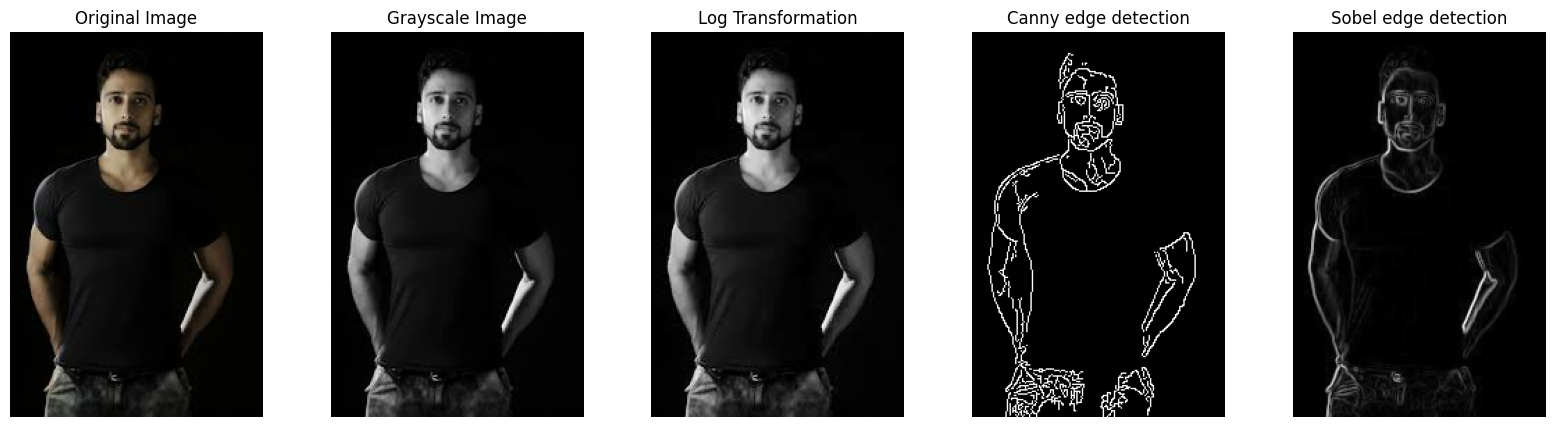

In [25]:
image = cv2.imread('images/model5.jpeg')

img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# log transformation starts to brighten the darker regin

gray_log = gray.astype("float32")/255.0
gray_log = np.log1p(gray_log)
gray_log = cv2.normalize(gray_log, None, 0, 255, cv2.NORM_MINMAX)
gray_log = gray_log.astype("uint8")

# log transformation ends

canny_edges = cv2.Canny(gray_log, 50, 150)

# sobel operator starts

sobel_x = cv2.Sobel(gray_log, cv2.CV_64F, 1, 0)
sobel_y = cv2.Sobel(gray_log, cv2.CV_64F, 0, 1)
sobel = cv2.magnitude(sobel_x, sobel_y)

# sobel operator ends

plt.figure(figsize=(20, 5))

plt.subplot(1,5,1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(img)

plt.subplot(1, 5, 2)
plt.title('Grayscale Image')
plt.axis('off')
plt.imshow(gray, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('Log Transformation')
plt.axis('off')
plt.imshow(gray_log, cmap='gray')

plt.subplot(1, 5, 4)
plt.title('Canny edge detection')
plt.axis('off')
plt.imshow(canny_edges, cmap='gray')

plt.subplot(1, 5, 5)
plt.title('Sobel edge detection')
plt.axis('off')
plt.imshow(sobel, cmap='gray')